Plot saved as test_l2_comparison.png


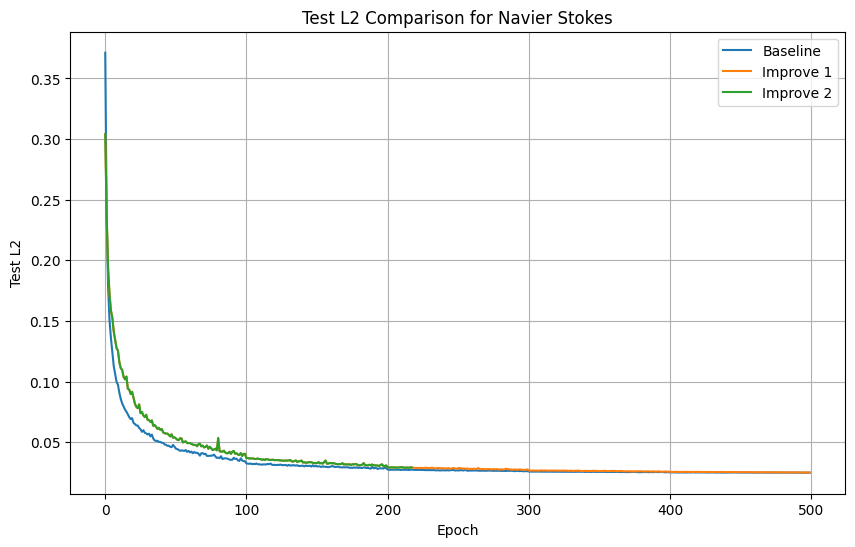

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load datasets
baseline_df = pd.read_csv('baseline_3d.txt', sep='\s+', header=None)
baseline_df.columns = ['epoch', 'time', 'train_loss', 'train_l2', 'test_l2']

# load datasets
improve_3d_no_early_stop_df = pd.read_csv('/home/ubuntu/ece228/fourier_neural_operator/output_3d_no_earlystop/ns_fourier_N500_Ntest100_train_error.txt', sep='\s+', header=None)
improve_3d_no_early_stop_df.columns = ['epoch', 'time', 'train_loss', 'train_l2', 'test_l2']


# The improve_2 CSV has no header and is tab-separated.,
improve_3d = pd.read_csv('training_metrics_3d_20250610_055905.csv', sep=',', header=None)
improve_3d.columns = ['epoch', 'time', 'train_loss', 'train_l2', 'test_l2', 'learning_rate']

# Create a list to store indices of rows to keep
valid_indices = []

# Iterate through each row
for idx, row in improve_3d.iterrows():
    # Check if epoch can be converted to float and is not NaN
    if isinstance(row['epoch'], str) and (row['epoch'].startswith('Best model') or row['epoch'].startswith('Early')):
        continue
    epoch = float(row['epoch'])
    if not pd.isna(epoch):
        valid_indices.append(int(idx))


# Filter dataframe to keep only valid rows
improve_3d = improve_3d.iloc[valid_indices]

# Create the plot,
plt.figure(figsize=(10, 6))

plt.plot(range(len(baseline_df)), baseline_df['test_l2'], label='Baseline')
plt.plot(range(len(improve_3d_no_early_stop_df)), improve_3d_no_early_stop_df['test_l2'], label='Improve 1')
plt.plot(range(len(improve_3d)), improve_3d['test_l2'], label='Improve 2')

# Add labels and title,
plt.xlabel('Epoch')
plt.ylabel('Test L2')
plt.title('Test L2 Comparison for Navier Stokes')
plt.legend()
plt.grid(True)

# Save the plot,
plt.savefig('test_l2_comparison_ns.png')

print("Plot saved as test_l2_comparison_ns.png")


After cleaning:
    epoch  time train_loss  train_l2   test_l2  learning_rate
0       0  1.82   0.237065  0.987656  0.935846         0.0001
2       1  1.27   0.127207  0.665630  0.351375         0.0001
4       2  1.27   0.035206  0.311305  0.284346         0.0001
6       3  1.28   0.022283  0.242703  0.202197         0.0001
8       4  1.27   0.010998  0.165146  0.141403         0.0001
..    ...   ...        ...       ...       ...            ...
619   495  1.27   0.000005  0.002202  0.003340         0.0000
620   496  1.27   0.000005  0.002202  0.003343         0.0000
621   497  1.27   0.000005  0.002203  0.003345         0.0000
622   498  1.28   0.000005  0.002203  0.003341         0.0000
623   499  1.27   0.000005  0.002200  0.003345         0.0000

[500 rows x 6 columns]
Plot saved as test_l2_comparison_fab_log.png
Plot saved as test_l2_comparison_fab.png


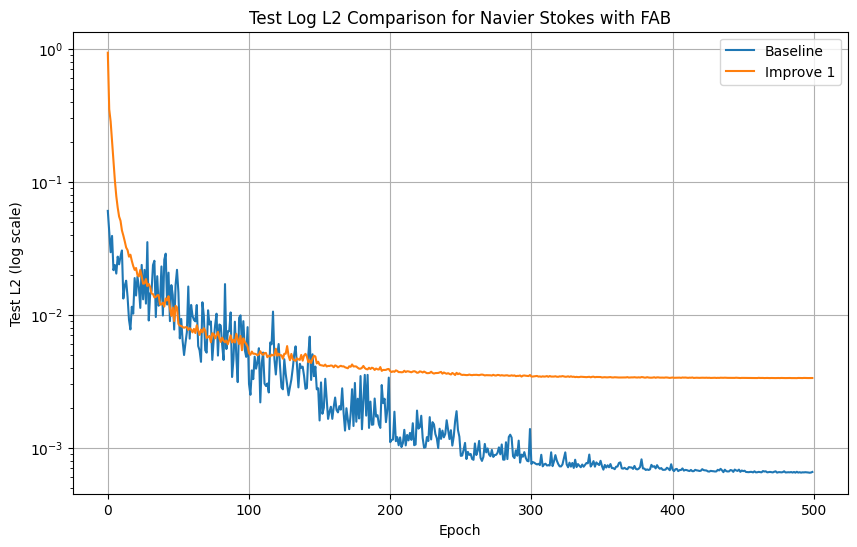

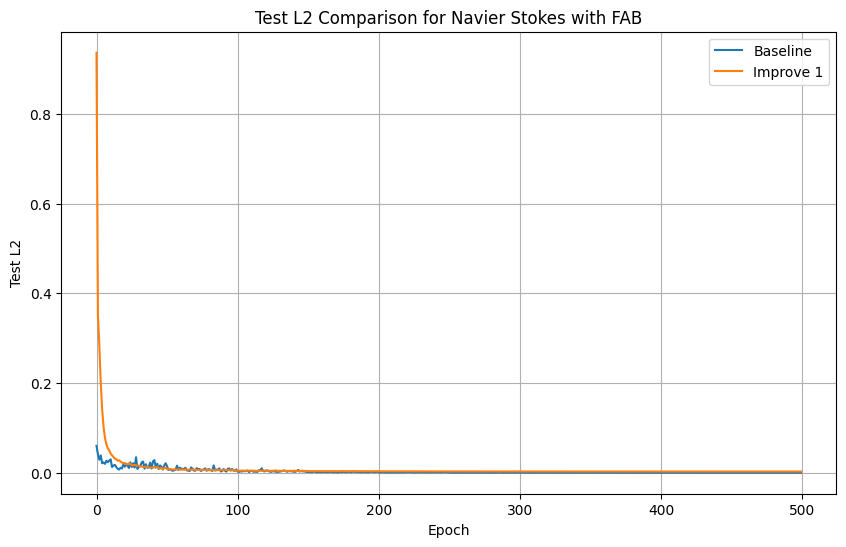

In [54]:
baseline_1d = pd.read_csv('/home/ubuntu/ece228/fourier_neural_operator/ECE228 Final Project Reproduce - fourier_1D＿GPU.csv', sep=',', header=None)
baseline_1d.columns = ['epoch', 'time', 'train_loss', 'train_l2', 'test_l2']

improve_1d = pd.read_csv('training_metrics_1d_20250610_215650.csv', sep=',', header=None)
improve_1d.columns = ['epoch', 'time', 'train_loss', 'train_l2', 'test_l2', 'learning_rate']

# Create a list to store indices of rows to keep
valid_indices = []

# Iterate through each row
for idx, row in improve_1d.iterrows():
    # Check if epoch can be converted to float and is not NaN
    if isinstance(row['epoch'], str) and row['epoch'].startswith('Best model'):
        continue
    epoch = float(row['epoch'])
    if not pd.isna(epoch):
        valid_indices.append(int(idx))


# Filter dataframe to keep only valid rows
improve_1d = improve_1d.iloc[valid_indices]

print("After cleaning:")
print(improve_1d)

# Create the plot,
plt.figure(figsize=(10, 6))

plt.semilogy(range(len(baseline_1d)), baseline_1d['test_l2'], label='Baseline')
plt.semilogy(range(len(improve_1d)), improve_1d['test_l2'], label='Improve 1')

# Add labels and title,
plt.xlabel('Epoch')
plt.ylabel('Test L2 (log scale)')
plt.title('Test Log L2 Comparison for Navier Stokes with FAB')
plt.legend()
plt.grid(True)

# Save the plot,
plt.savefig('test_l2_comparison_fab_log.png')

print("Plot saved as test_l2_comparison_fab_log.png")

# plot a new one with normal scale
plt.figure(figsize=(10, 6))

plt.plot(range(len(baseline_1d)), baseline_1d['test_l2'], label='Baseline')
plt.plot(range(len(improve_1d)), improve_1d['test_l2'], label='Improve 1')

# Add labels and title,
plt.xlabel('Epoch')
plt.ylabel('Test L2')
plt.title('Test L2 Comparison for Navier Stokes with FAB')
plt.legend()
plt.grid(True)

# Save the plot,
plt.savefig('test_l2_comparison_fab.png')

print("Plot saved as test_l2_comparison_fab.png")